# Baseball Case Study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features-

1.	W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.

2.	R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.

3.	AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.

4.	H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.

5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.

6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.

7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.

8.	BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.

9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.

10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.

11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.

12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.

13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.

14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.

15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.

16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.

17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

-- Output: Number of predicted wins (W)


Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

#to view figures locally
import plotly.offline as py  
import plotly.graph_objs as go
from plotly.figure_factory import create_table

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



from sklearn.model_selection import train_test_split

Importing the dataset

In [2]:
bb_df = pd.read_csv("baseball.csv")

In [3]:
# check the first five columns of the dataset

bb_df.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

In [4]:
bb_df.tail()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
25  92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26  84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27  79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28  74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29  68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV   E  
25   21  47  75  
26   18  41  78  
27   12  44  86  
28    6  41  92  
29    4  36  95

Exploratory Data Analysis (EDA) 

In [5]:
#Checking for missing values

missing_values = bb_df.isnull().sum()

missing_values

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

from the above we can see that there are no missing values in the dataset.

In [6]:
# check the shape of the dataset

print(f"The rows and columns in the dataset: {bb_df.shape}")

print(f"\n The column headers in the dataset: {bb_df.columns}")

The rows and columns in the dataset: (30, 17)

 The column headers in the dataset: Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')


In [7]:
# Checking the datatypes

bb_df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [8]:
# Checking th information

bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [9]:
# Checking to see if there are duplicated rows in the dataframe

print("Total Duplicate Rows are ", bb_df.duplicated().sum())

Total Duplicate Rows are  0


In [10]:
# Statistical summary

bb_df.describe()


W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

In [11]:
# Correlation matrix

bb_df.corr()

W         R        AB         H        2B        3B        HR  \
W    1.000000  0.430751 -0.087947  0.037612  0.427797 -0.251118  0.307407   
R    0.430751  1.000000  0.319464  0.482856  0.560084 -0.070072  0.671283   
AB  -0.087947  0.319464  1.000000  0.739122  0.453370  0.435422 -0.066983   
H    0.037612  0.482856  0.739122  1.000000  0.566847  0.478694 -0.090855   
2B   0.427797  0.560084  0.453370  0.566847  1.000000  0.220490  0.056292   
3B  -0.251118 -0.070072  0.435422  0.478694  0.220490  1.000000 -0.430915   
HR   0.307407  0.671283 -0.066983 -0.090855  0.056292 -0.430915  1.000000   
BB   0.484342  0.402452 -0.136414 -0.118281  0.302700 -0.454949  0.425691   
SO   0.111850 -0.054726 -0.106022 -0.398830 -0.150752 -0.141196  0.359923   
SB  -0.157234  0.081367  0.372618  0.413444  0.195027  0.457437 -0.136567   
RA  -0.812952 -0.041623  0.316010  0.224324 -0.218160  0.314125 -0.103903   
ER  -0.809435 -0.041245  0.309686  0.252489 -0.235531  0.340225 -0.085922   
ERA -0.819600 -0.049281  0.255551  0.231172 -0.254854  0.330951 -0.090917   
CG   0.080533  0.232042 -0.080876  0.147955  0.306675 -0.065898  0.156502   
SHO  0.471805 -0.103274 -0.197321 -0.145559  0.057998 -0.041396 -0.019119   
SV   0.666530 -0.096380 -0.106367 -0.130371  0.171576 -0.142370 -0.028540   
E   -0.089485 -0.023262  0.316743 -0.033173  0.105754  0.126678 -0.207597   

           BB        SO        SB        RA        ER       ERA        CG  \
W    0.484342  0.111850 -0.157234 -0.812952 -0.809435 -0.819600  0.080533   
R    0.402452 -0.054726  0.081367 -0.041623 -0.041245 -0.049281  0.232042   
AB  -0.136414 -0.106022  0.372618  0.316010  0.309686  0.255551 -0.080876   
H   -0.118281 -0.398830  0.413444  0.224324  0.252489  0.231172  0.147955   
2B   0.302700 -0.150752  0.195027 -0.218160 -0.235531 -0.254854  0.306675   
3B  -0.454949 -0.141196  0.457437  0.314125  0.340225  0.330951 -0.065898   
HR   0.425691  0.359923 -0.136567 -0.103903 -0.085922 -0.090917  0.156502   
BB   1.000000  0.233652 -0.098347 -0.416445 -0.452663 -0.459832  0.462478   
SO   0.233652  1.000000  0.030968 -0.129745 -0.161612 -0.180368 -0.093418   
SB  -0.098347  0.030968  1.000000  0.132290  0.143068  0.126063 -0.020783   
RA  -0.416445 -0.129745  0.132290  1.000000  0.991018  0.986674 -0.016659   
ER  -0.452663 -0.161612  0.143068  0.991018  1.000000  0.997248 -0.020221   
ERA -0.459832 -0.180368  0.126063  0.986674  0.997248  1.000000 -0.009856   
CG   0.462478 -0.093418 -0.020783 -0.016659 -0.020221 -0.009856  1.000000   
SHO  0.426004  0.237721 -0.106563 -0.636862 -0.630192 -0.630833  0.241676   
SV   0.099445  0.126297 -0.183418 -0.616224 -0.589663 -0.607005 -0.367766   
E   -0.075685  0.155133  0.079149  0.198996  0.136921  0.113137 -0.140047   

          SHO        SV         E  
W    0.471805  0.666530 -0.089485  
R   -0.103274 -0.096380 -0.023262  
AB  -0.197321 -0.106367  0.316743  
H   -0.145559 -0.130371 -0.033173  
2B   0.057998  0.171576  0.105754  
3B  -0.041396 -0.142370  0.126678  
HR  -0.019119 -0.028540 -0.207597  
BB   0.426004  0.099445 -0.075685  
SO   0.237721  0.126297  0.155133  
SB  -0.106563 -0.183418  0.079149  
RA  -0.636862 -0.616224  0.198996  
ER  -0.630192 -0.589663  0.136921  
ERA -0.630833 -0.607005  0.113137  
CG   0.241676 -0.367766 -0.140047  
SHO  1.000000  0.221639 -0.115716  
SV   0.221639  1.000000 -0.025636  
E   -0.115716 -0.025636  1.000000

Visualizations

In [12]:
#  Errors (E) vs. Wins (W)

fig = px.scatter(bb_df, x='E', y='W', labels={'E': 'Errors', 'W': 'Wins'},
                 title='Errors vs Wins')
fig.show()


In [13]:
# ERA (Earned Run Average) vs. Wins (W)

fig = px.scatter(bb_df, x='ERA', y='W', labels={'ERA': 'Earned Run Average', 'W': 'Wins'},
                 title='ERA vs Wins')
fig.show()


In [14]:
# Home Runs (HR) vs. Runs (R)

fig = px.scatter(bb_df, x='HR', y='R', labels={'HR': 'Home Runs', 'R': 'Runs'},
                 title='Home Runs vs Runs')
fig.show()


In [15]:
# 3D Scatter Plot: Relationship between Runs (R), Home Runs (HR), and Wins (W)

fig = px.scatter_3d(bb_df, x='R', y='HR', z='W', labels={'R': 'Runs', 'HR': 'Home Runs', 'W': 'Wins'},
                    title='3D view of Runs, Home Runs, and Wins')
fig.show()


In [16]:
# Histogra  Distribution of Wins (W)

fig = px.histogram(bb_df, x="W", title='Distribution of Wins')
fig.show()


In [17]:
#  Box Plot: Distribution of Earned Run Average (ERA)

fig = px.box(bb_df, y='ERA', title='Distribution of Earned Run Average (ERA)')
fig.show()


In [18]:
# Line Plot: Trends in Runs Scored (R) over Index

fig = px.line(bb_df, y='R', labels={'index': 'Index', 'R': 'Runs Scored'},
              title='Trends in Runs Scored over Index')
fig.show()


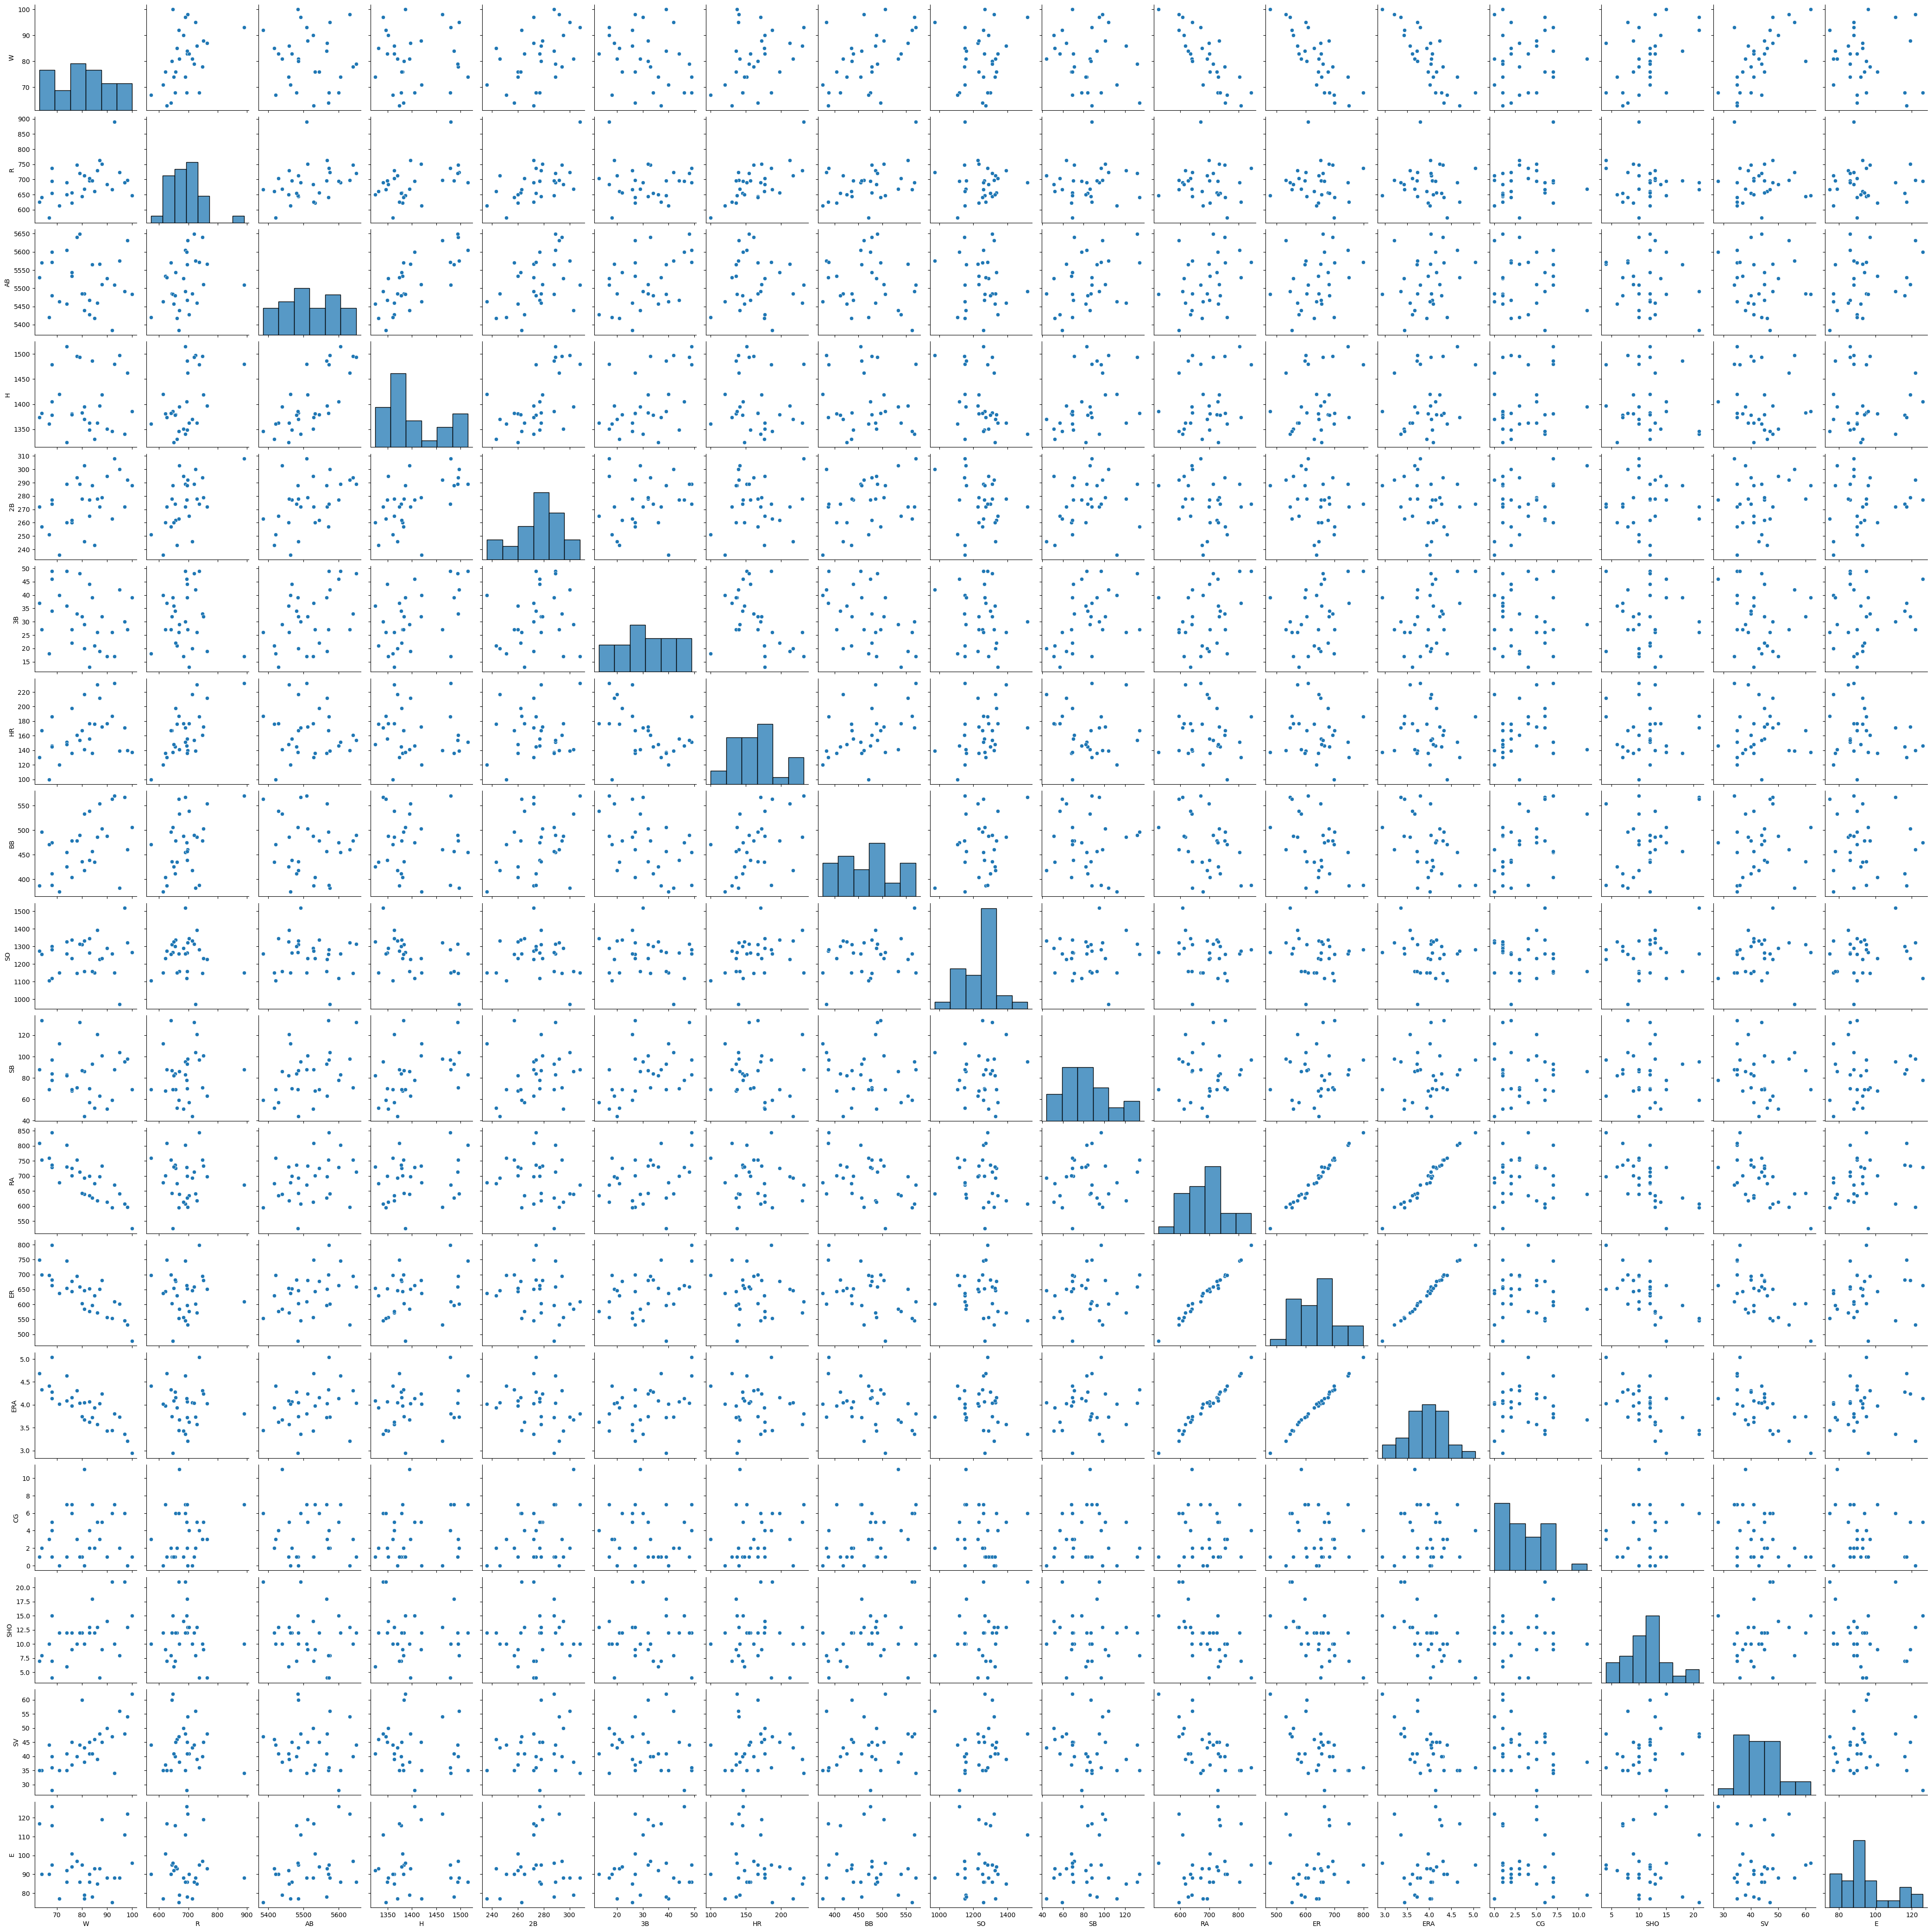

In [19]:
sns.pairplot(data=bb_df)

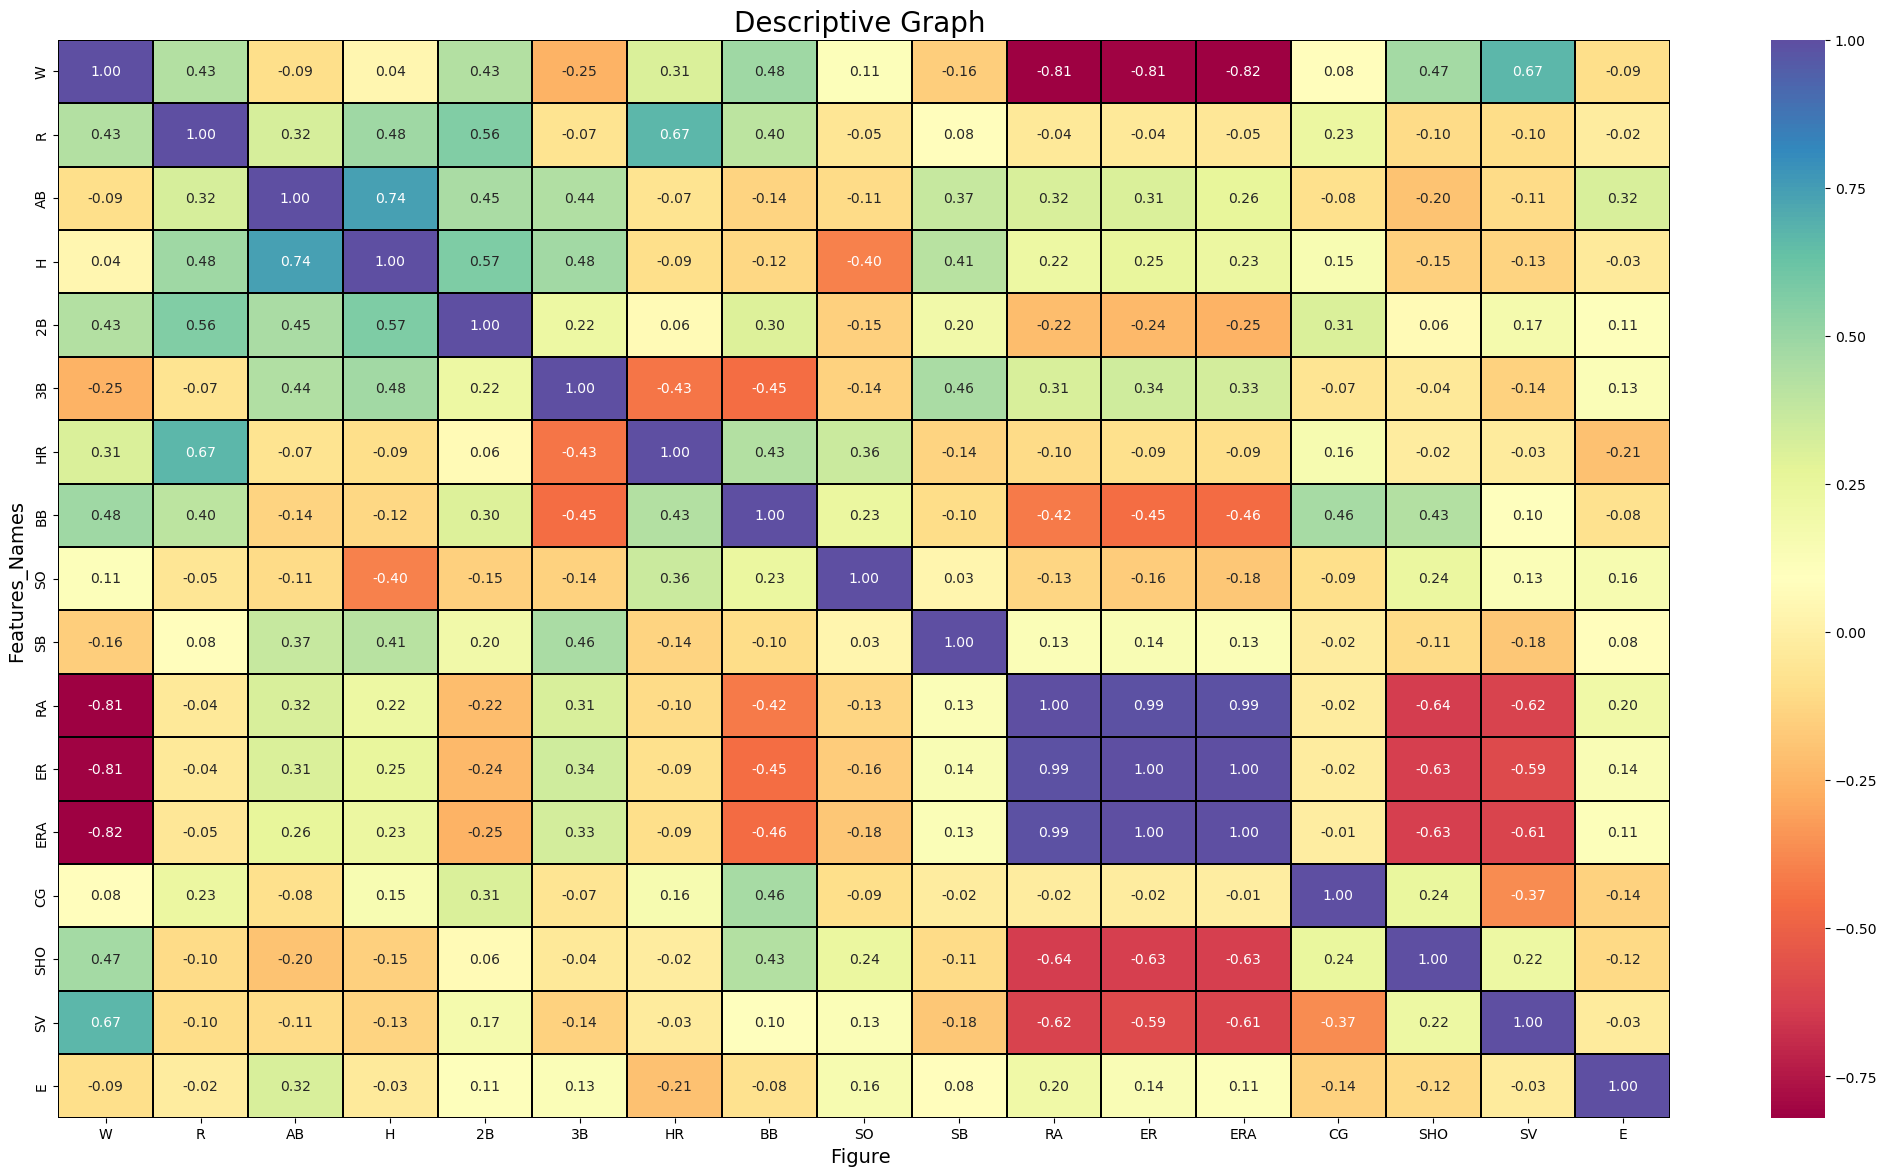

In [20]:
# Heatmap visualization

plt.figure(figsize = (26, 14))
sns.heatmap(bb_df.corr(),annot = True, fmt='0.2f',linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure ', fontsize = 14)
plt.ylabel('Features_Names ', fontsize= 14)
plt.title('Descriptive Graph ', fontsize = 20)

plt.show()

In [21]:
# checking the correlation of every feature with the target variable

bb_df.corr().W.sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

Text(0.5, 1.0, 'Correlation between label and features using barplot')

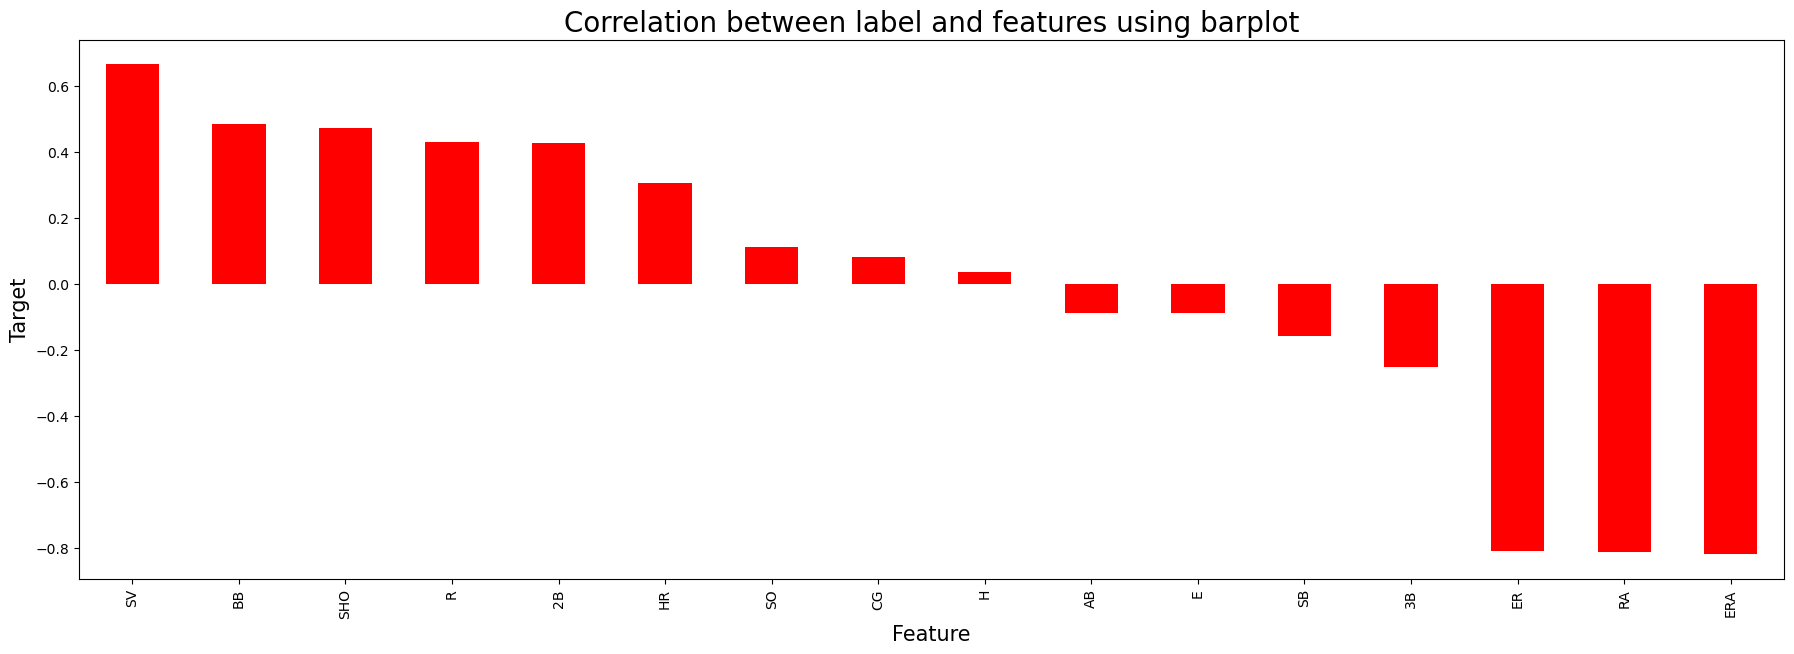

In [22]:
# Visualizing the correlation between label and feautures using bar plot

plt.figure(figsize = (22, 7))
bb_df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind='bar',color='r')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title('Correlation between label and features using barplot', fontsize = 20)

from the above we can that ER,RA,ERA have the strongest but negative correlation with the target variable.

SV has the strongest positive correlation followed by BB,SHO,R,2B.


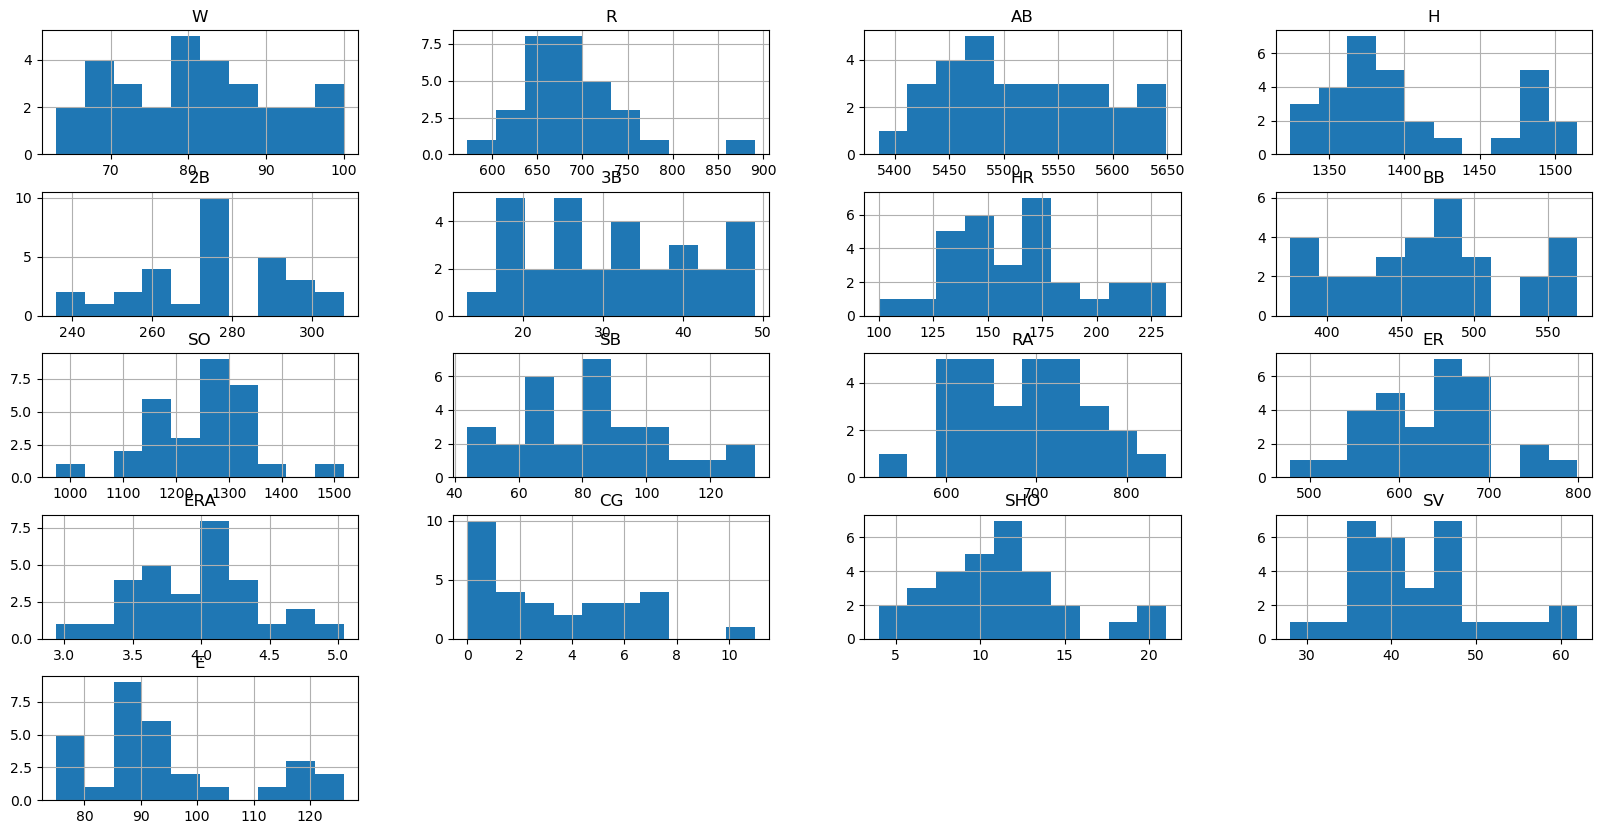

In [23]:

plt.figure(figsize=(20, 10))

# Subplot for histogram
plt.subplot(1, 2, 1)
bb_df.hist(ax=plt.gca())      #setting it to current axes

plt.show()


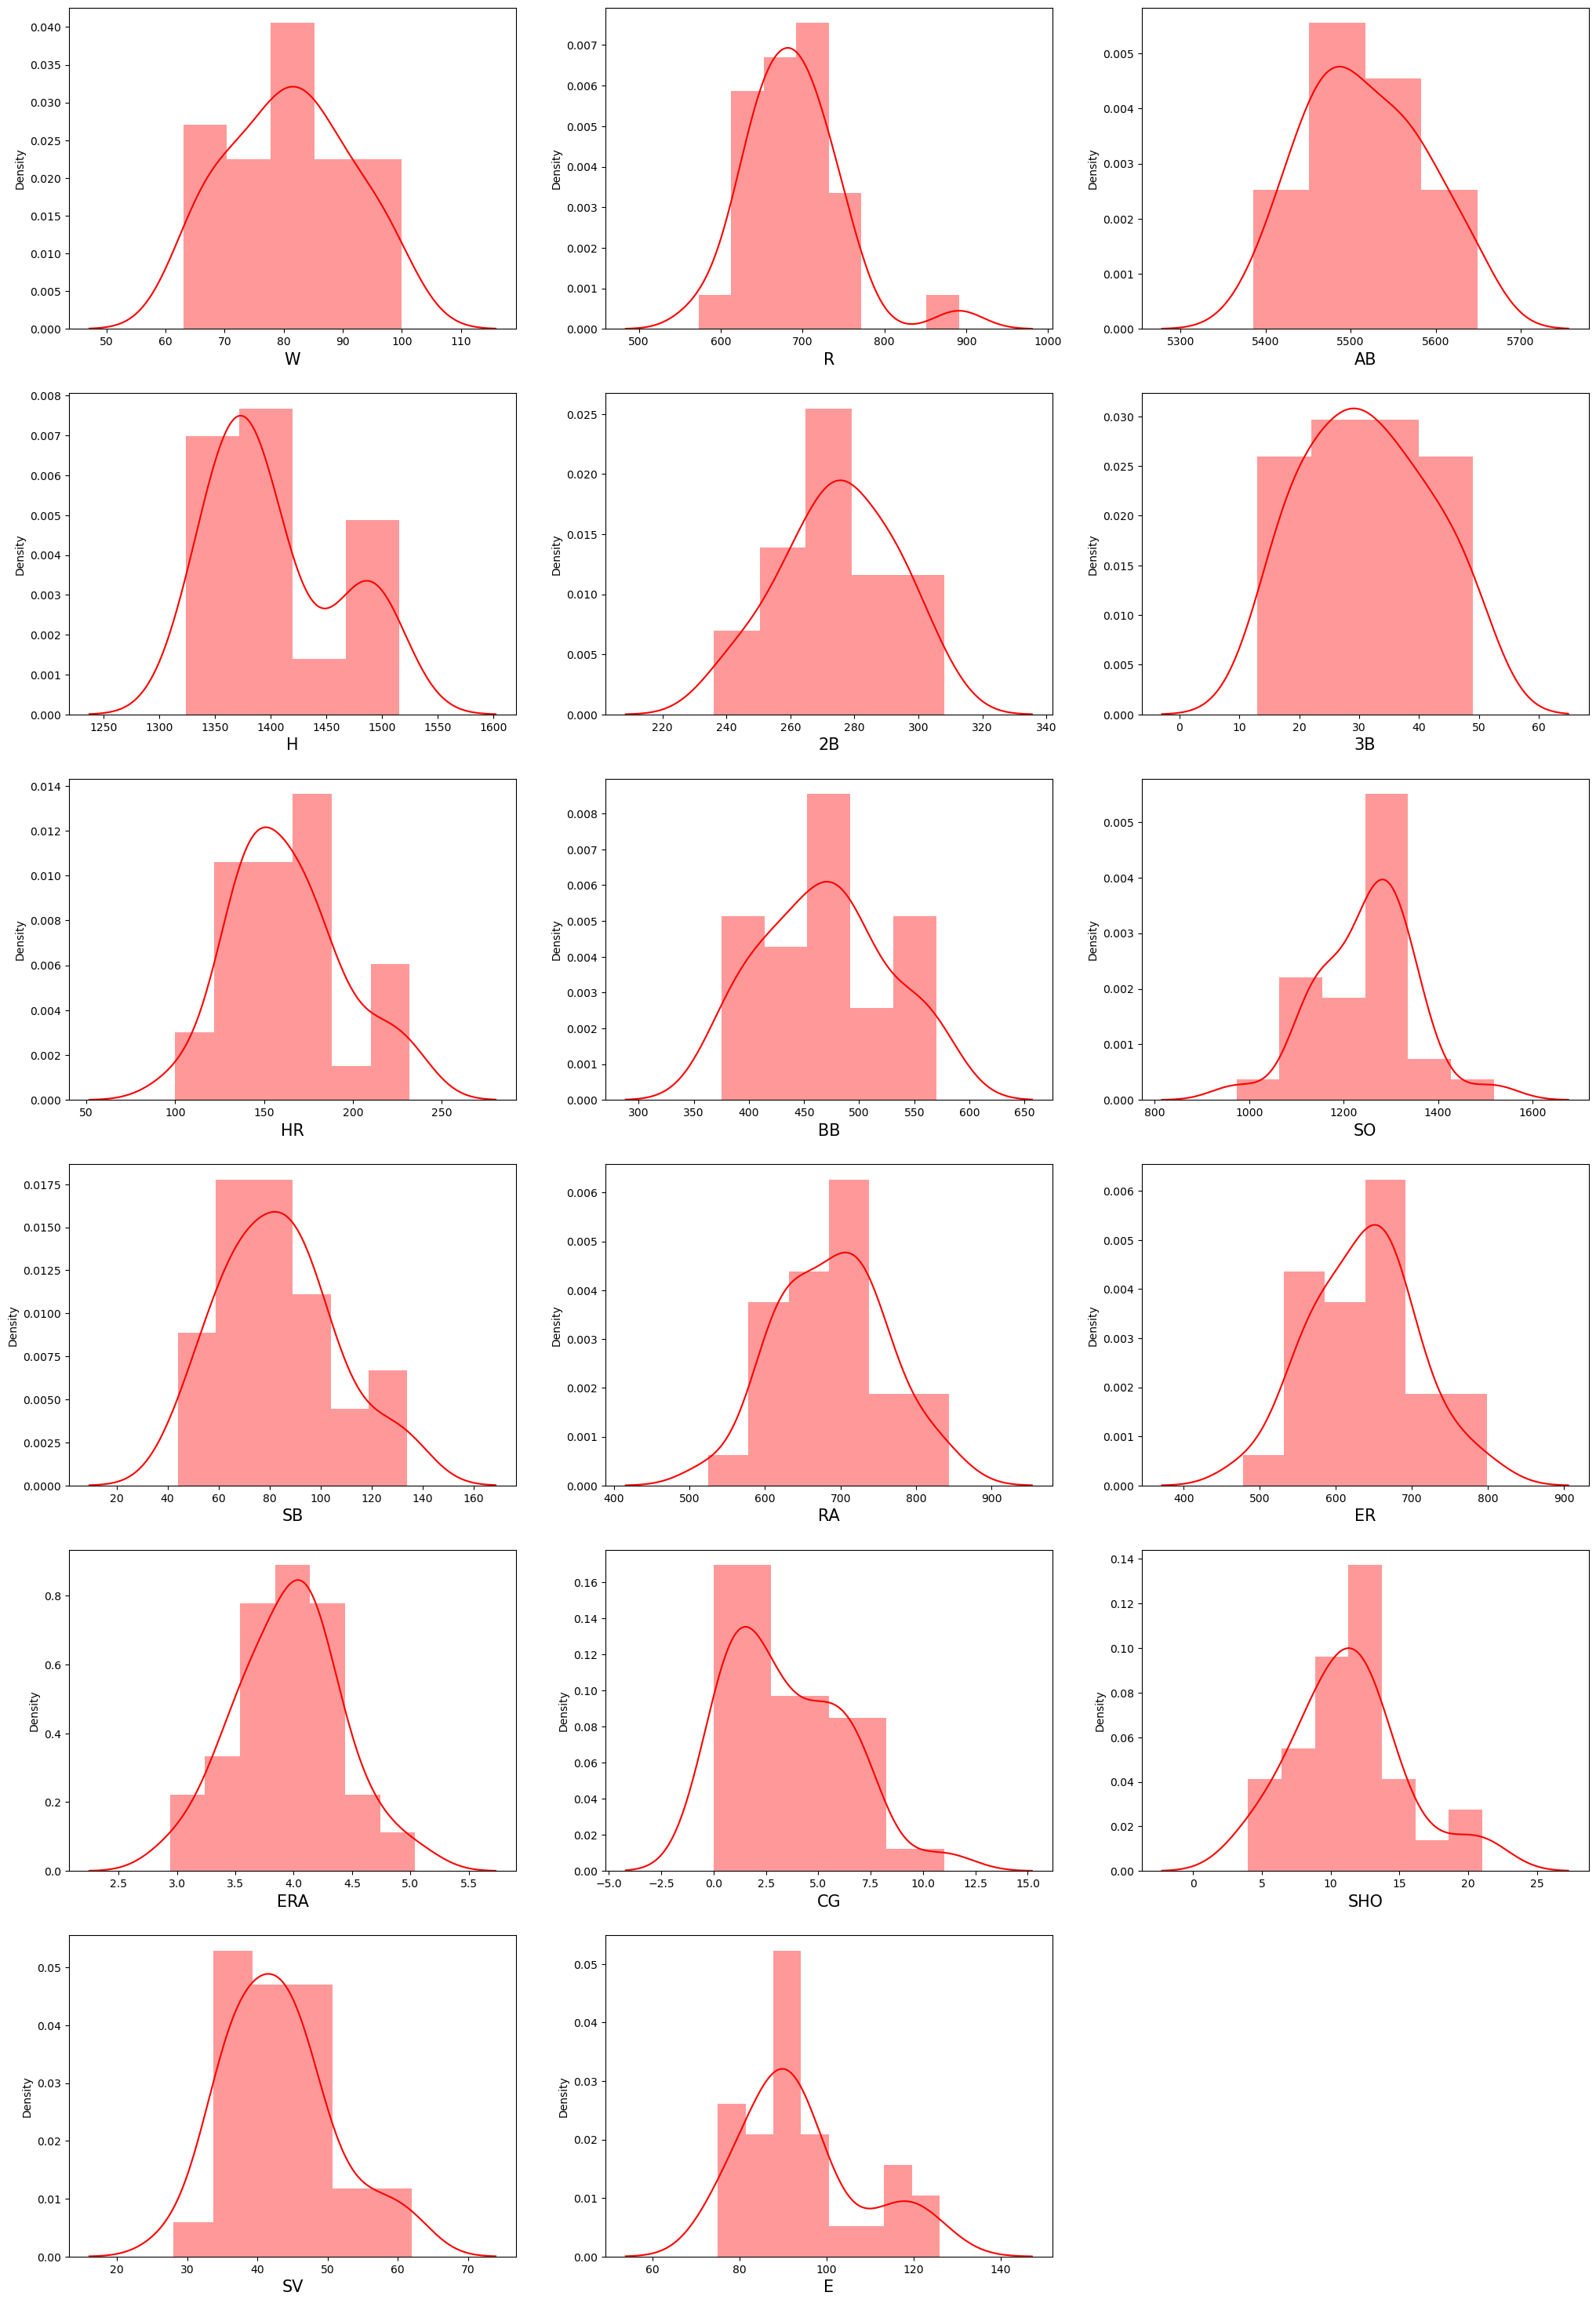

In [24]:
# univariate analysis

plt.figure(figsize = (25,50))
position = 1

for column in bb_df:
    if position <=17:
        ax = plt.subplot(8,3,position)
        sns.distplot(bb_df[column], color = 'r')
        plt.xlabel(column,fontsize=15)
        
    position +=1
plt.show()

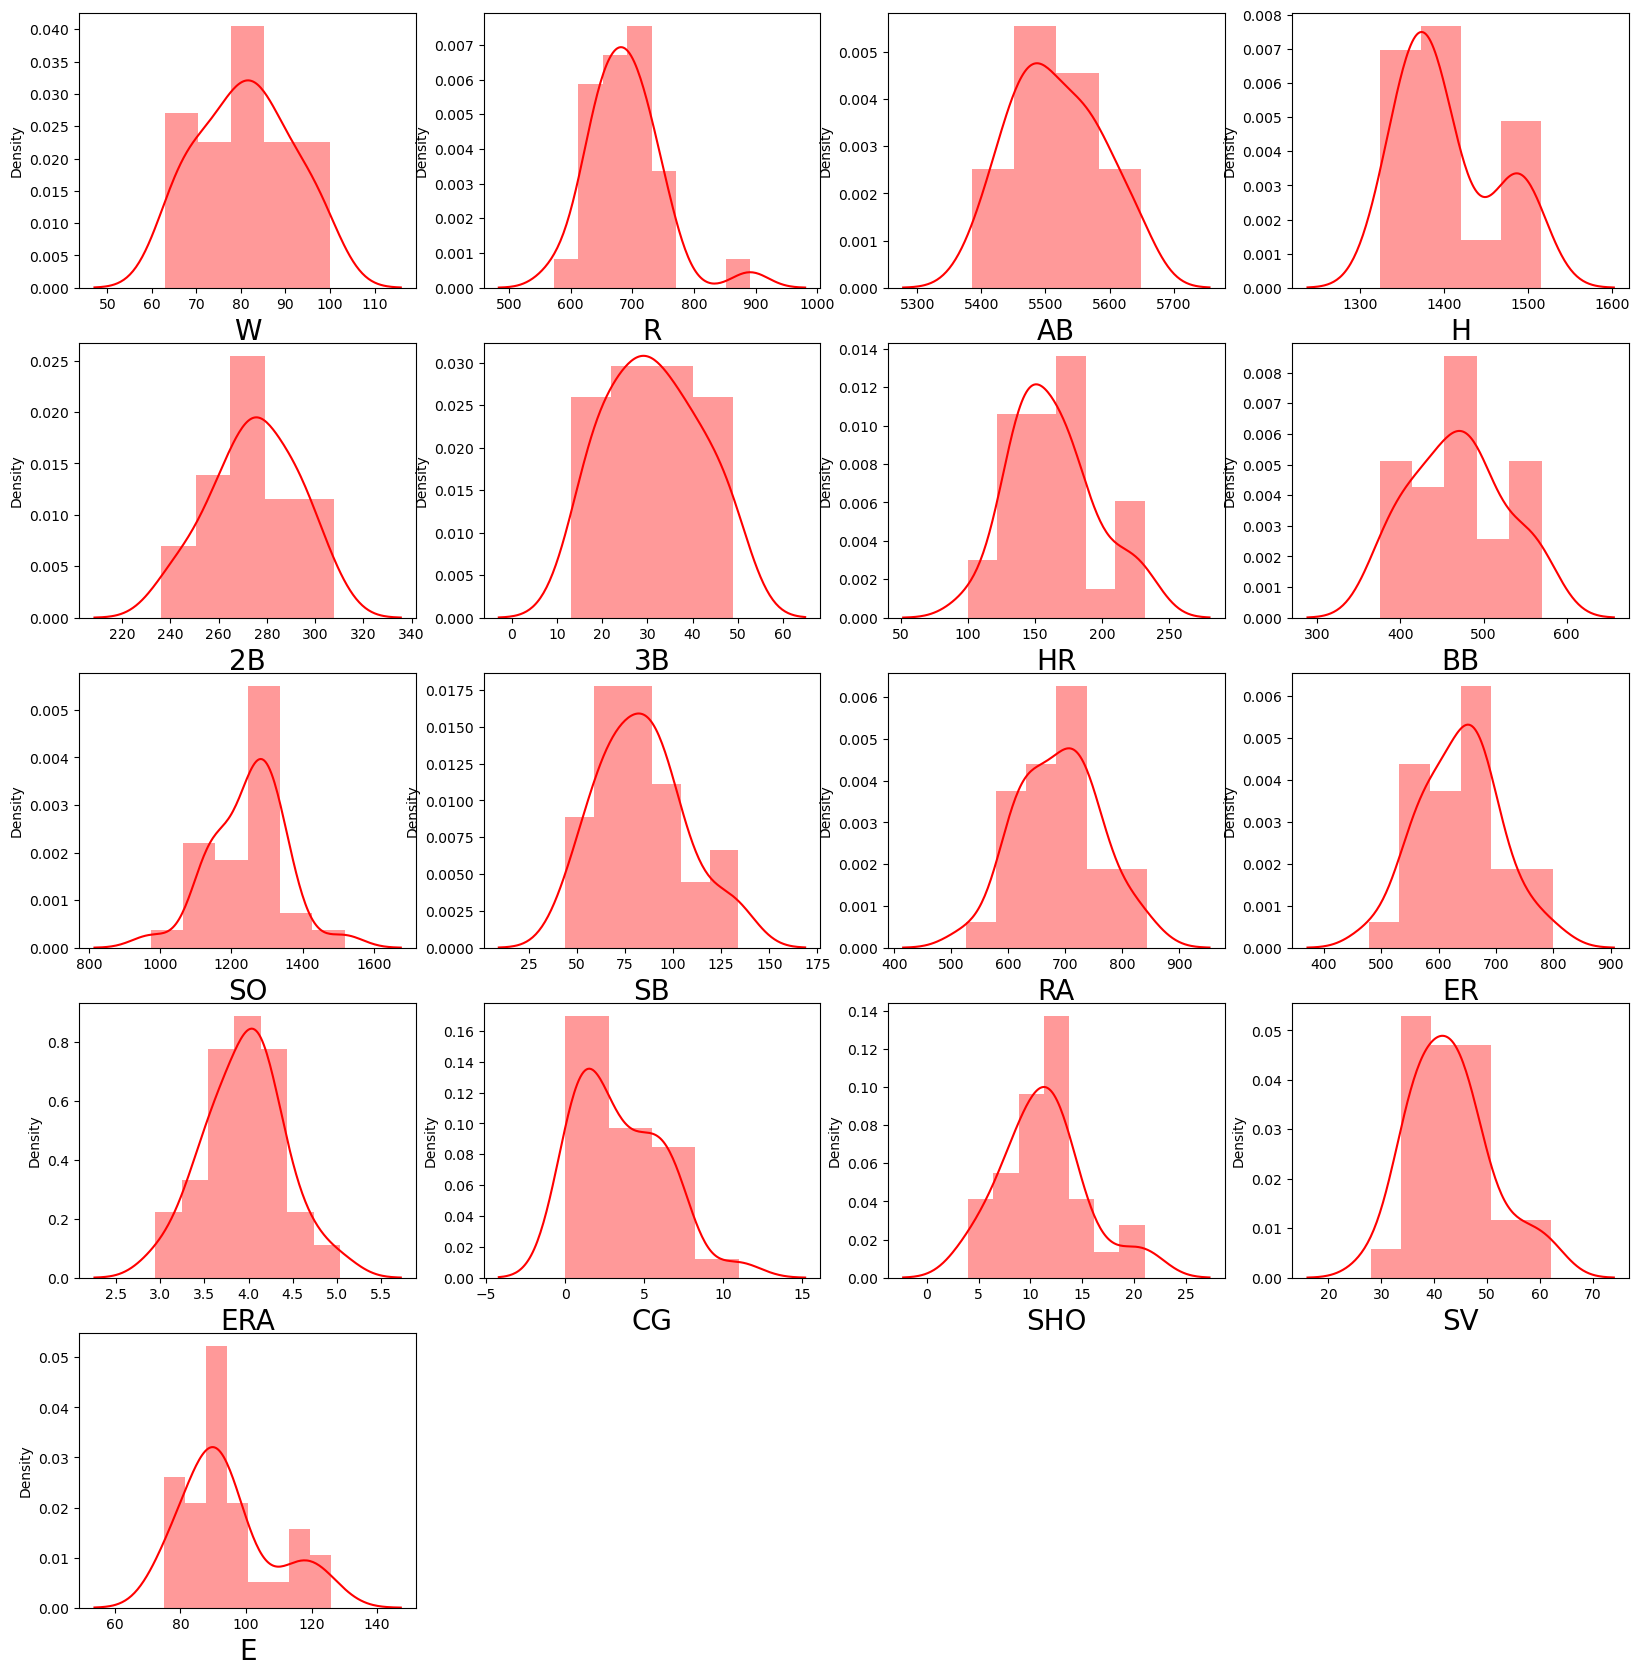

In [25]:
# checking the skewness of the data

plt.figure(figsize = (20, 25))
spot = 1

for column in bb_df:
    if spot<=17:
        ax = plt.subplot(6,4, spot)
        sns.distplot(bb_df[column], color = 'r')
        plt.xlabel(column, fontsize= 20)
    spot+=1
plt.show()

from the above distribution plot we can notice that the data almost looks normal in all columns except Error(E) and Complete Game(CG)

In [26]:
# checking skewness further

bb_df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Ideally, skewnwess is bewtween -1 and 1, from the above the features falls between range

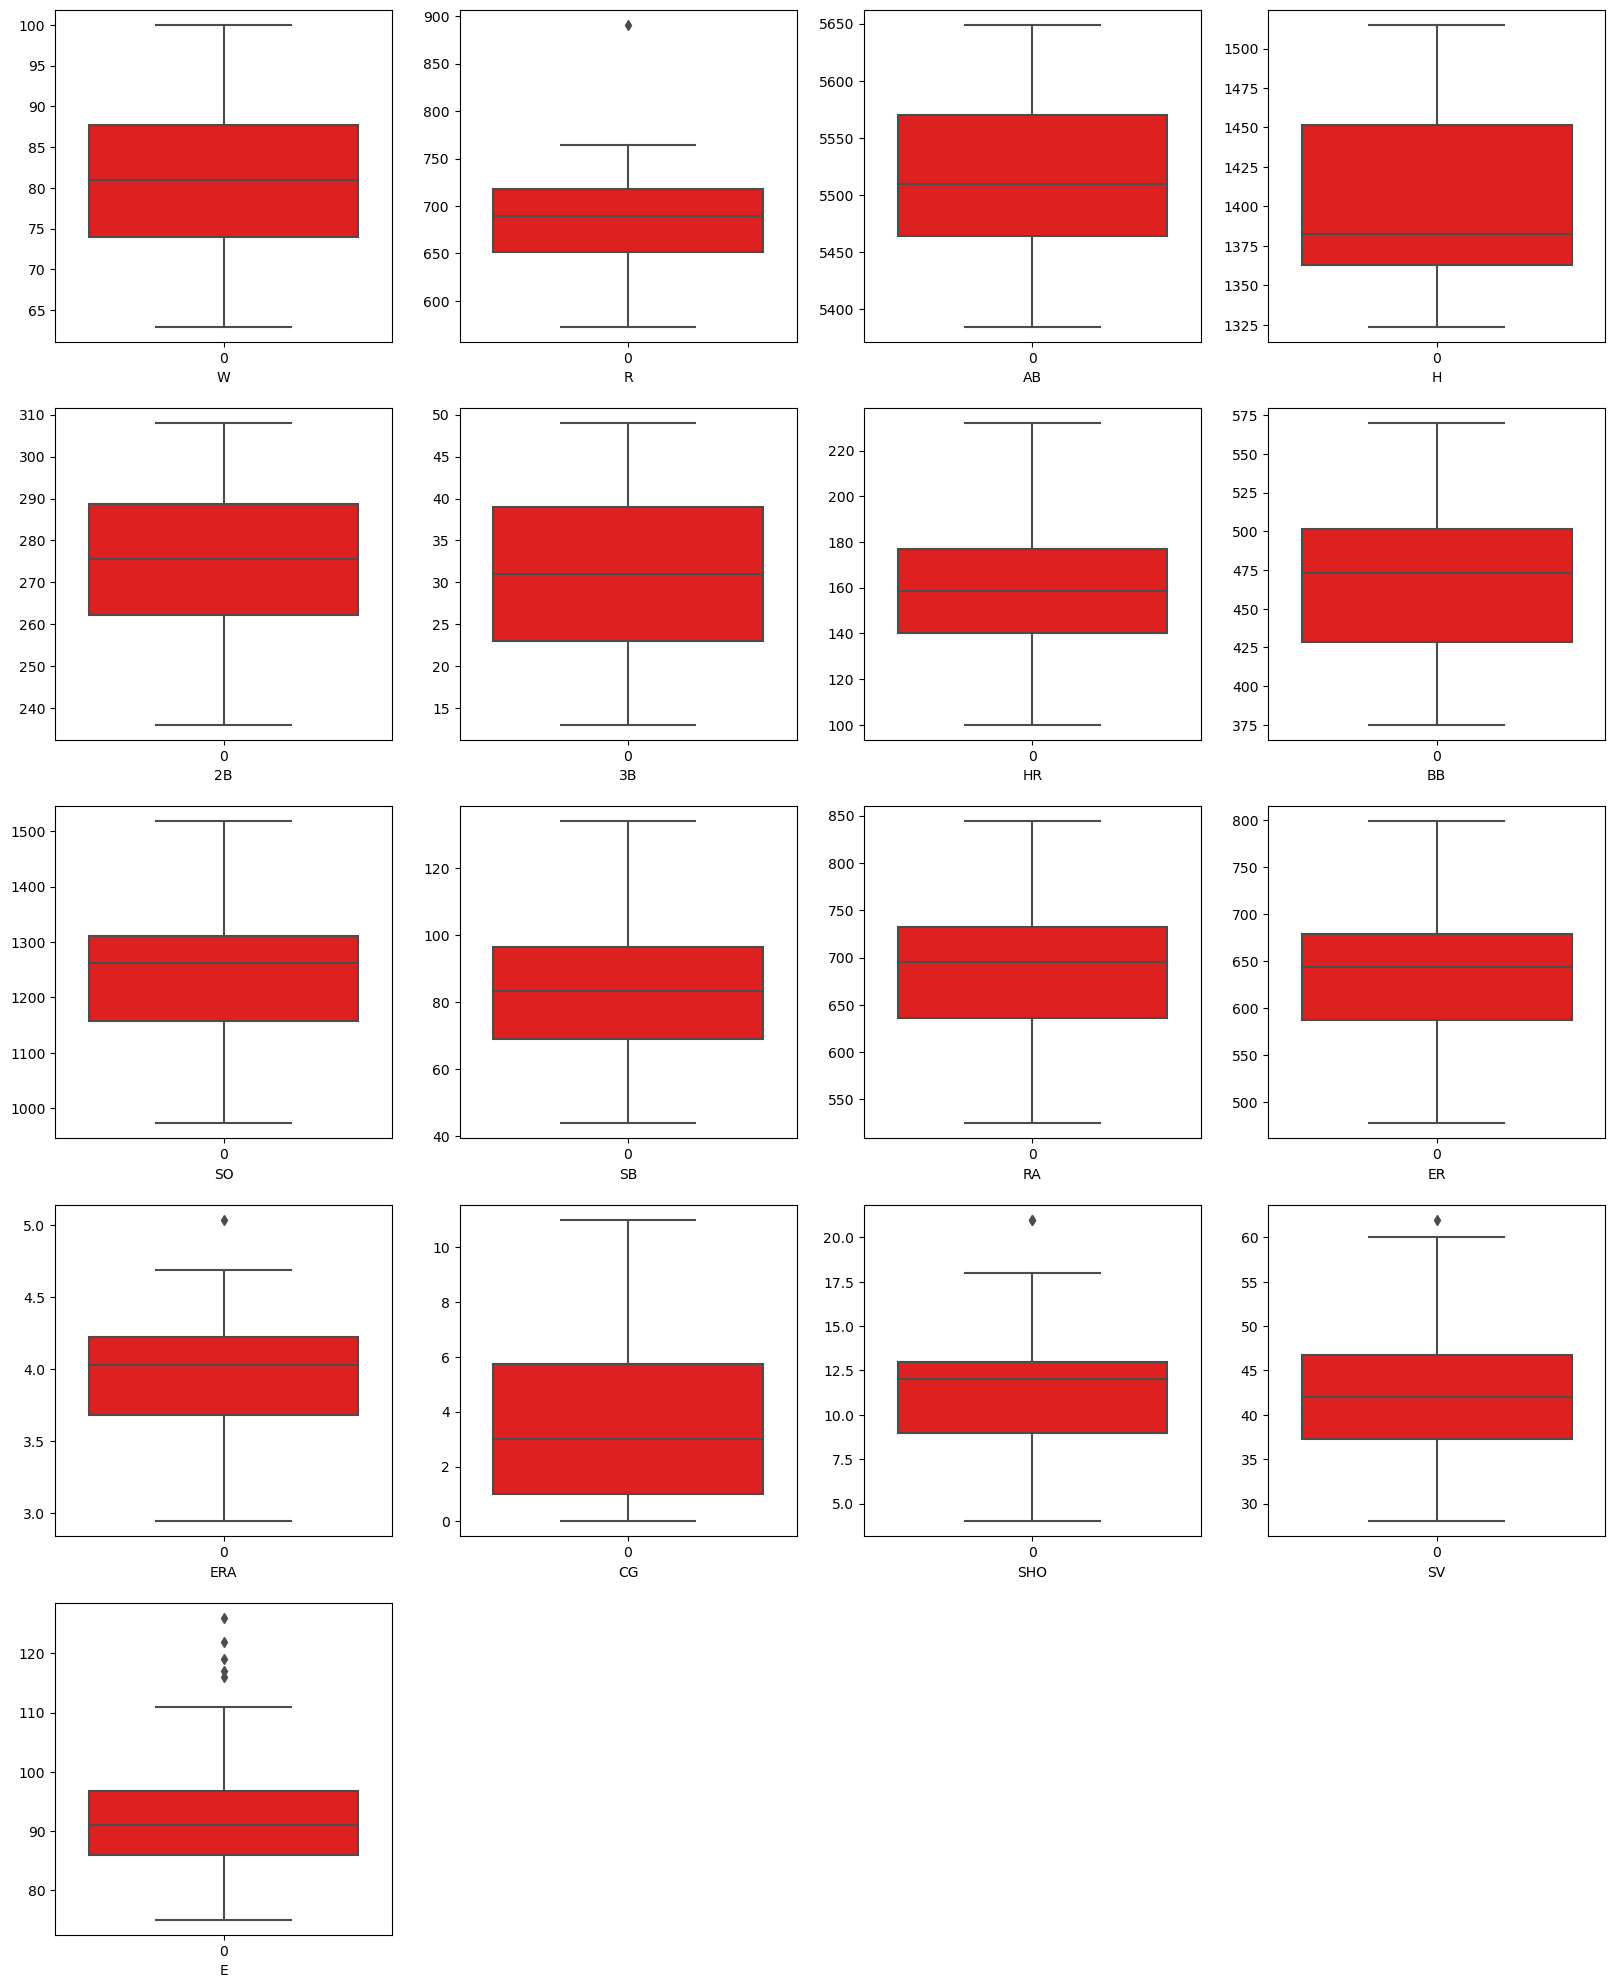

In [27]:
# lets check the outliers by plotting boxplot

plt.figure(figsize = (20,25))
G = 1
for i in bb_df:
    if G<=17:
        plt.subplot(5,4,G)
        sns.boxplot(bb_df[i], color="red")
        plt.xlabel(i)
    G+=1
    
plt.show()

from the above, we found outlier in some columns which are E, SV, SHO, ERA and R.

so, removing the outliers using zscore and IQR techniques before building the model and selected best one.

Outliers is not removed from categorical columns and target column

In [28]:
from scipy.stats import zscore

out_features=bb_df[['E', 'SV', 'SHO', 'ERA', 'R']]
z=np.abs(zscore(out_features))

z

# abs means absolute value. it converts any negatives to positive

E        SV       SHO       ERA         R
0   0.461470  1.671607  0.814629  0.506955  0.619078
1   0.607197  0.249879  0.172800  0.254598  0.134432
2   1.117242  0.654856  0.320914  0.641347  0.332906
3   0.485758  0.784104  0.567771  0.053010  1.146419
4   0.607197  1.042600  0.172800  1.531318  0.013270
5   0.461470  1.171848  0.320914  0.350165  3.509647
6   0.097152  0.637623  1.802057  0.165003  1.311430
7   1.262970  0.008617  0.320914  0.209800  0.428681
8   0.048576  2.188598  0.172800  0.484557  0.765626
9   0.194303  0.396360  0.320914  0.792164  1.034489
10  1.797303  0.249879  0.567771  0.635374  1.086415
11  0.680061  0.525608  0.419657  0.865333  0.705622
12  0.097152  0.379127  0.172800  0.036584  0.471376
13  0.024288  0.249879  0.172800  0.456185  0.557920
14  2.307348  1.947335  0.913371  0.411388  0.099814
15  0.121439  2.447094  0.913371  2.276445  0.713699
16  2.015894  1.413111  0.419657  1.671683  0.151740
17  1.214394  0.637623  2.394514  1.335704  0.013270
18  1.578712  0.396360  1.061486  0.724968  0.575229
19  0.315742  1.042600  0.814629  0.836961  0.834861
20  0.461470  0.896119  0.666514  1.178913  0.090583
21  0.315742  0.267112  0.419657  0.753340  0.255593
22  1.262970  1.042600  0.172800  0.142604  1.302198
23  0.315742  0.120631  0.320914  1.016150  1.994550
24  1.651576  1.042600  1.061486  1.643311  1.077184
25  1.408697  0.508375  2.394514  1.156515  0.367523
26  1.190106  0.267112  1.653943  0.529354  0.134432
27  0.607197  0.120631  0.172800  0.187402  0.549843
28  0.170015  0.267112  1.308343  0.299395  0.661773
29  0.048576  0.913352  1.802057  2.427263  0.844092

In [29]:
# using 3 as the threshold. any value more than 3 is considered as an outlier. from the standard deviation

np.where(z>3)

(array([5], dtype=int64), array([4], dtype=int64))

In [30]:
# removing the outliers
# keeping all the columns where the z value is less than 3

bb_df1 = bb_df[(z<3).all(axis=1)]

bb_df1.shape

(29, 17)

Data Preprocessing and Feature Engineering

In [31]:
# Seperating the Independent and target variables into x and y

x = bb_df1.drop("W", axis = 1)

y = bb_df1["W"]

print("Feature shape - ", x.shape)

print("Label shape - ", y.shape)

Feature shape -  (29, 16)
Label shape -  (29,)


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x

R        AB         H        2B        3B        HR        BB  \
0   0.959398  0.830084  1.738306  1.556538  1.010845 -0.765863 -1.536359   
1   0.331147 -0.702831 -0.938698  0.201171  1.208917 -0.181389 -0.495021   
2  -0.274666 -1.100253 -0.106656  1.733325 -0.276617 -0.697101  1.252941   
3  -1.329231  0.233951 -0.359886 -0.800621 -0.474688 -0.869006 -1.145857   
4   0.174084  1.255894  2.063888  0.908319  1.704094 -0.353293 -0.197495   
5   1.856900  0.716535 -0.070480 -0.093474 -1.266972  1.743939  1.643442   
6   0.712585 -0.447345 -0.558853 -1.625627 -1.167936  1.915843 -0.885522   
7  -0.835605 -0.447345 -0.323710  0.260100  0.020490  0.196801 -0.550807   
8   1.497899  1.752672  1.702131  1.202964  0.119526 -0.009484  0.230197   
9   1.565212 -0.078310  0.327453  0.319029  0.020490  0.368705  0.695081   
10  1.071586 -0.816380 -0.685468  0.260100 -0.573723  2.362794  0.378960   
11 -0.454167 -1.412514 -1.264279 -1.802414 -1.068901  0.506228 -0.569402   
12 -0.566355  0.390081 -0.396062 -0.682763 -0.969865  1.262607  0.230197   
13  0.286272  1.184926  0.074223  0.201171  1.406988 -0.525197  0.174411   
14 -0.768292 -0.461539 -0.269447  0.849390  0.713739 -0.834625  0.750867   
15  0.353585  1.624929  1.105231  1.085106 -0.474688 -0.731482 -0.085923   
16  0.174084 -0.362183 -1.083401 -0.093474 -0.177581  0.334324  1.885182   
17 -0.588792 -0.518313 -0.414150  0.024384  0.218561 -0.559578 -0.997094   
18 -0.925355  0.773310 -0.341798 -0.977408 -0.474688  0.196801  0.564913   
19  0.039459  0.148789 -0.902522  1.261893 -1.465043  0.540609  0.416151   
20  0.488210 -1.256383 -0.685468 -0.505976 -1.861185  0.540609  1.364512   
21 -1.531169 -0.759605  0.345541 -2.214917  0.812774 -1.419099 -1.685122   
22 -2.428670 -1.369933 -0.721643 -1.330982 -1.366007 -2.106716  0.100030   
23 -1.239481  0.177176 -0.486501 -0.093474  0.515668 -1.075291 -1.461978   
24 -0.319542 -1.866711 -0.992961 -0.623834 -0.573723  0.884418  1.810800   
25  0.331147  0.688148  1.539340  0.849390  0.713739 -0.869006 -0.160305   
26  0.869648  1.880415  1.684043  0.908319  1.605059 -0.250150  0.453341   
27 -0.700980 -0.844767 -1.390895 -0.800621  0.416632 -0.456435 -0.736760   
28  1.251086  0.787503  1.412725  0.024384  1.704094  0.850037 -1.443382   

          SO        SB        RA        ER       ERA        CG       SHO  \
0  -2.727623  0.905953 -0.664514 -0.511148 -0.511388 -0.501486 -0.813262   
1   0.121896 -0.585315  0.154638  0.232161  0.238952 -0.501486  0.159299   
2  -0.925866  0.116458 -0.678397 -0.754153 -0.643801  2.854612 -0.326982   
3  -0.201246 -0.673037  0.168522  0.089217  0.040333  1.363013 -0.570122   
4   0.072935 -0.015124  1.584683  1.561540  1.496876  1.363013  0.159299   
5  -0.240414 -0.892341  0.126870  0.217866  0.150677 -0.128586 -1.785822   
6   0.777970 -1.725697  0.057451  0.132100  0.194815 -1.247285 -0.326982   
7   0.572335  0.160319 -0.650630 -0.468265 -0.489319 -0.874386  0.159299   
8  -1.013995 -0.541454  0.890486  0.818231  0.768604 -0.128586 -0.326982   
9  -0.181661  0.774370  0.612808  0.618110  0.614123  0.617213 -0.570122   
10  1.375292  1.651587 -0.983844 -0.925686 -0.864490  0.617213  0.402439   
11 -0.994411 -1.374810 -0.192460 -0.096610 -0.047943 -0.501486  0.159299   
12  0.826931 -0.629176  0.515620  0.575226  0.437572  0.990113  0.159299   
13 -1.297968 -0.234429  0.557272  0.389399  0.393434  0.617213  0.888719   
14  0.151272 -0.629176 -2.275049 -2.269360 -2.254827 -0.874386  0.888719   
15  0.689841  0.642788 -1.289290 -1.497462 -1.658968 -1.247285  0.402439   
16  2.609104  0.511205 -1.122683 -1.297340 -1.327935  0.990113  2.347560   
17  0.464621  0.028736  0.668344  0.646698  0.702398 -0.874386 -1.056402   
18  0.033766  2.221778  0.904370  0.903998  0.812742 -0.501486 -0.813262   
19  0.376492 -1.418671 -1.053264 -1.140102 -1.173453 -0.874386  0.645579   
20  0.905268 -1.155506 -0.747817 -0.854214 -0.754146  0.244314  0.402439   
21 -0.994411  1.256840 -0.150808  0.017745  0.128608 -1.24

In [33]:
# finding the best random state

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Maximum r2 score is ", maxAccu, " on Random_state ",maxRS)

Maximum r2 score is  0.9125242537047682  on Random_state  104


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRS)

In [35]:
# Initialize the models
linear_model = LinearRegression()
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()
knn_model = KNeighborsRegressor()
DT_model = DecisionTreeRegressor()
SGD_model = SGDRegressor()

# List of models
models = [linear_model, gradient_boosting_model, svr_model, knn_model, DT_model, SGD_model]
model_names = ['Linear Regression', 'Gradient Boosting', 'Support Vector Machines', 'K-Nearest Neighbors', 'Decision Tree', 'SGD']

# Creating a DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'RMSE', 'R2', 'MAE', 'MSE'])

# Evaluating each model
for i, model in enumerate(models):
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_test_pred = model.predict(x_test)
    
    # Initializing Evaluation Metrics
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)

    
    # Store results
    results_df.loc[i] = [model_names[i], rmse_test, r2_test, mae_test, mse]

# Display the results
results_df.sort_values(by='R2', ascending=False)


Model       RMSE        R2        MAE         MSE
0        Linear Regression   3.400917  0.912524   2.814845   11.566238
5                      SGD   3.718045  0.895450   3.384244   13.823859
3      K-Nearest Neighbors   7.362065  0.590084   6.600000   54.200000
1        Gradient Boosting   7.397435  0.586136   5.647402   54.722044
4            Decision Tree  10.203485  0.212605   7.888889  104.111111
2  Support Vector Machines  10.967704  0.090240  10.188929  120.290539

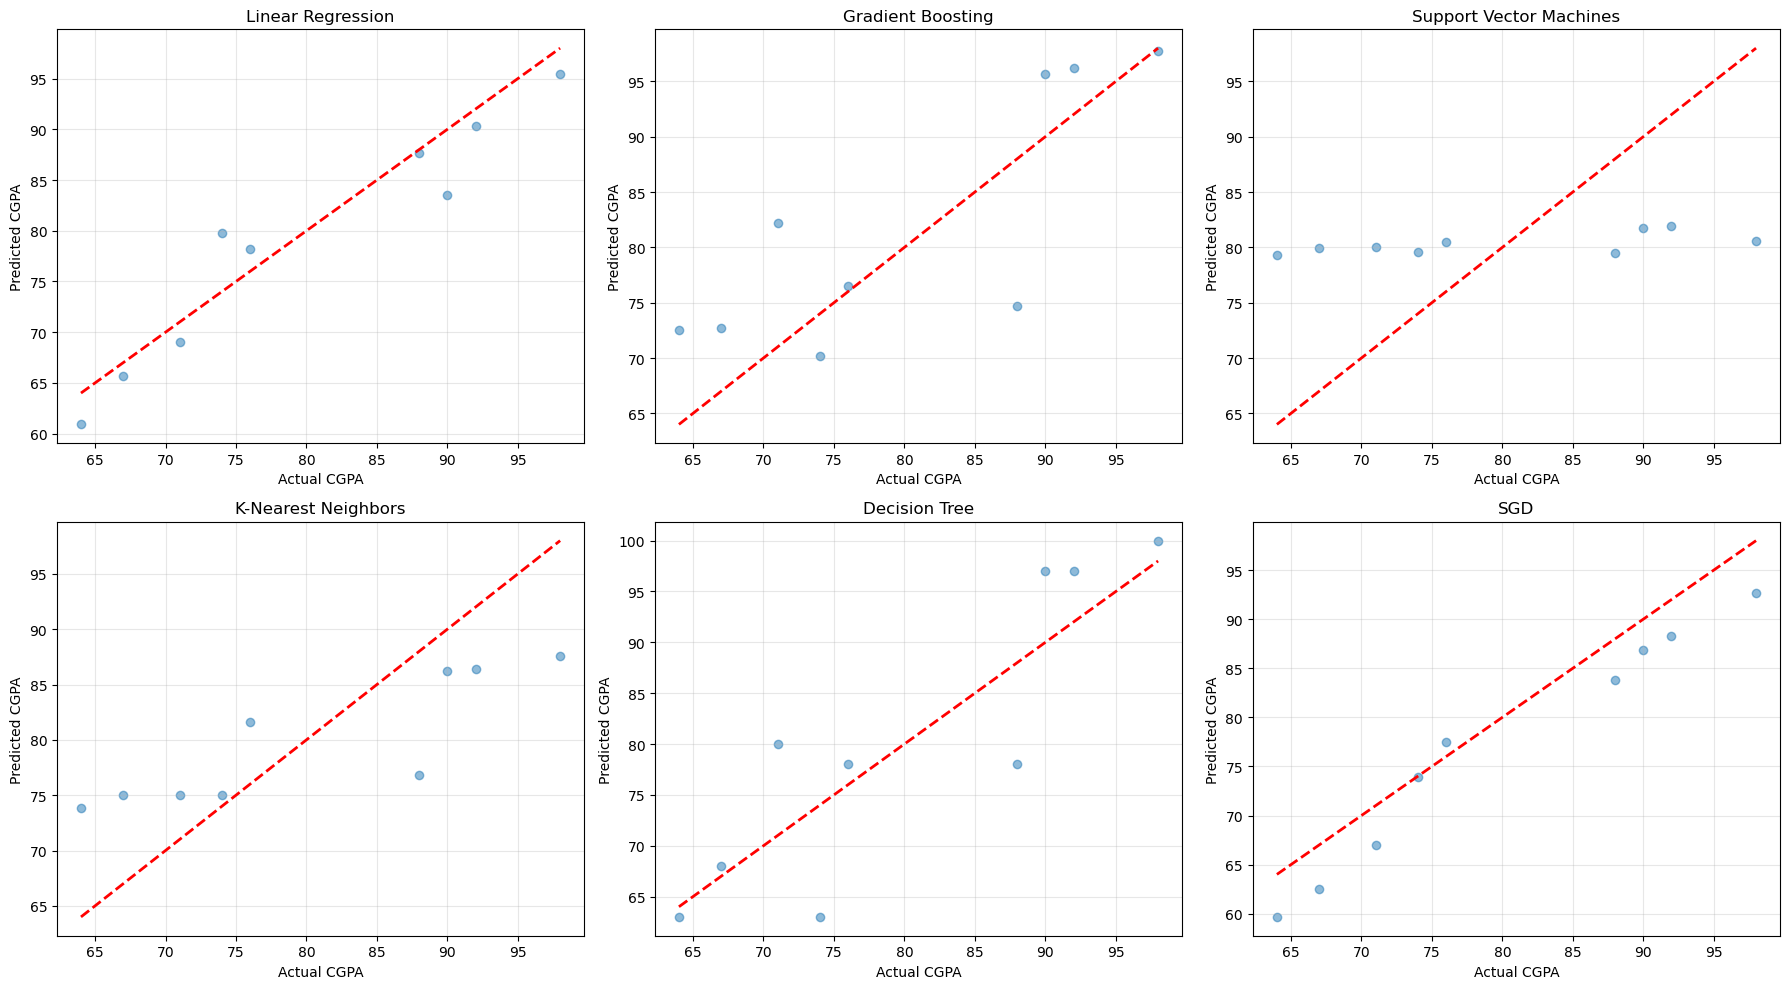

In [36]:
# Initialize models for prediction

linear_model = LinearRegression().fit(x_train, y_train)
DT_model = DecisionTreeRegressor().fit(x_train, y_train)
knn_model = KNeighborsRegressor().fit(x_train, y_train)
svr_model = SVR().fit(x_train, y_train)
gradient_boosting_model = GradientBoostingRegressor().fit(x_train, y_train)
SGD_model = SGDRegressor().fit(x_train, y_train)


# Models and their names

models = [linear_model, gradient_boosting_model, svr_model, knn_model, DT_model, SGD_model]
model_names = ['Linear Regression', 'Gradient Boosting', 'Support Vector Machines', 'K-Nearest Neighbors', 'Decision Tree', 'SGD']

# Initialize the plot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Plot each model's predictions vs. actual values
for i, (model, name) in enumerate(zip(models, model_names)):
    # Predictions
    y_pred = model.predict(x_test)
    
    # Determine the row and column for the subplot
    row = i // 3
    col = i % 3
    
    # Scatter plot
    axes[row, col].scatter(y_test, y_pred, alpha=0.5)
    axes[row, col].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', lw=2, color='r')
    
    # Titles and labels
    axes[row, col].set_title(name)
    axes[row, col].set_xlabel("Actual CGPA")
    axes[row, col].set_ylabel("Predicted CGPA")
    axes[row, col].grid(alpha=0.3)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [37]:
from sklearn.model_selection import cross_val_score, cross_validate

# Scoring parameters
scoring = ['neg_mean_squared_error', 'r2']


models = {'linear_model':LinearRegression(),
'gradient_boosting_mode': GradientBoostingRegressor(),
'svr_model': SVR(),
'knn_model': KNeighborsRegressor(),
'DT_model': DecisionTreeRegressor(),
'SGD_model': SGDRegressor()
          
}



# Perform 5-fold cross-validation and store results
cv_results = {}
for name, model in models.items():
    scores = cross_validate(model, x_train, y_train, scoring=scoring, cv=5, return_train_score=True)
    
    # Calculate metrics
    train_mse = -scores['train_neg_mean_squared_error'].mean()
    train_rmse = np.sqrt(train_mse)
    train_r2 = scores['train_r2'].mean()
    test_mse = -scores['test_neg_mean_squared_error'].mean()
    test_rmse = np.sqrt(test_mse)
    test_r2 = scores['test_r2'].mean()
    
    # calculate the Standard deviation of the scores to check for overfitting/underfitting
    train_std = scores['train_r2'].std()
    test_std = scores['test_r2'].std()
    
    cv_results[name] = {
        'Train MSE': train_mse, 'Train RMSE': train_rmse, 'Train R2': train_r2, 'Train R2 Std': train_std,
        'Test MSE': test_mse, 'Test RMSE': test_rmse, 'Test R2': test_r2, 'Test R2 Std': test_std
    }

cv_results


{'linear_model': {'Train MSE': 4.695300107875463e-28,
  'Train RMSE': 2.1668641184613914e-14,
  'Train R2': 1.0,
  'Train R2 Std': 0.0,
  'Test MSE': 726.5689030379788,
  'Test RMSE': 26.954942089308574,
  'Test R2': -9.638825304536715,
  'Test R2 Std': 9.892636814501207},
 'gradient_boosting_mode': {'Train MSE': 1.2477070263661455e-06,
  'Train RMSE': 0.0011170080690693983,
  'Train R2': 0.9999999859615821,
  'Train R2 Std': 1.0240859420247989e-08,
  'Test MSE': 83.87310525231833,
  'Test RMSE': 9.158226097466601,
  'Test R2': -0.4374211289684958,
  'Test R2 Std': 1.5165795293984776},
 'svr_model': {'Train MSE': 70.9225785881462,
  'Train RMSE': 8.421554404511449,
  'Train R2': 0.21234087722590073,
  'Train R2 Std': 0.026808159673711494,
  'Test MSE': 86.98595937162571,
  'Test RMSE': 9.326626366035347,
  'Test R2': -0.3518486668102201,
  'Test R2 Std': 0.6055142686597947},
 'knn_model': {'Train MSE': 31.98649999999999,
  'Train RMSE': 5.655660880922758,
  'Train R2': 0.64393087307914

In [ ]:
import joblib

# save the model as object file

joblib.dump(linear_model, 'linearfile.obj')

#load the model from the file

linear_from_joblib=joblib.load('linearfile.obj')

#use the loaded model to make prediction

linear_from_joblib.predict(x_test)